# Education

In [1]:
import pandas as pd
import geopandas as gpd

### Get neighborhood location data
`'geoid10'` is the column we care about. We will use this to match scores to neighborhoods later.

In [2]:
neighborhoods = gpd.read_file('https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip')
neighborhoods['geoid10'] = neighborhoods['geoid10'].astype(float)

### Get the education data
We see the same `'geoid10'` field here.

In [3]:
df = pd.read_csv('Neighborhoods_with_SNAP_Data.csv')
grads = pd.DataFrame()
grads['geoid10'] = df['Neighborhood_2010_GEOID10']

Convert the dataframe to use floats instead of strings that happen to be numbers with a %.

In [4]:
def percent_to_float(series):
    return series.str.rstrip('%').astype(float) / 100

grads['High School'] = percent_to_float(df['Edu__Attainment__High_School_Gr'])
grads['Bachelors'] = percent_to_float(df['Edu__Attainment__Bachelor_s_Deg'])
grads['Postgrad'] = percent_to_float(df['Edu__Attainment__Postgraduate_D'])
grads.head()

,geoid10,High School,Bachelors,Postgrad
0,420030405001,0.395,0.149,0.185
1,420030404001,0.231,0.274,0.299
2,420030402002,0.467,0.201,0.172
3,420030305002,0.460,0.137,0.068
4,420030203001,0.273,0.334,0.185


Here we weigh the different tyeps of degrees to balance out "more impressive" ones. This score is what we use to rate each neighborhood.

In [5]:
grads['Edu Score'] = grads['High School'] + 2 * grads['Bachelors'] + 4 * grads['Postgrad']
grads['Edu Score'] = grads['Edu Score'] / grads['Edu Score'].max()
grads['Edu Score']

0     0.590198
1     0.813427
2     0.641269
3     0.414333
4     0.692339
        ...   
85    0.396211
86    0.444399
87    0.368204
88    0.432455
89    0.217051
Name: Edu Score, Length: 90, dtype: float64

### Matching geography with scores
Here is where we make use of the `'geoid10'` column of both dataframes to match the education score with the geographical location.

In [6]:
neighborhoods['Edu Score'] = 0.0
for i, row in grads.iterrows():
    for j, neighborhood in neighborhoods.iterrows():
        if row['geoid10'] == neighborhood['geoid10']:
            neighborhoods.at[j, 'Edu Score'] = row['Edu Score']
            break
neighborhoods['Edu Score']

0     0.729819
1     0.938633
2     0.404448
3     0.564662
4     0.393740
        ...   
85    0.997117
86    0.381796
87    0.286244
88    0.609143
89    0.363262
Name: Edu Score, Length: 90, dtype: float64

### Plots

<AxesSubplot:>

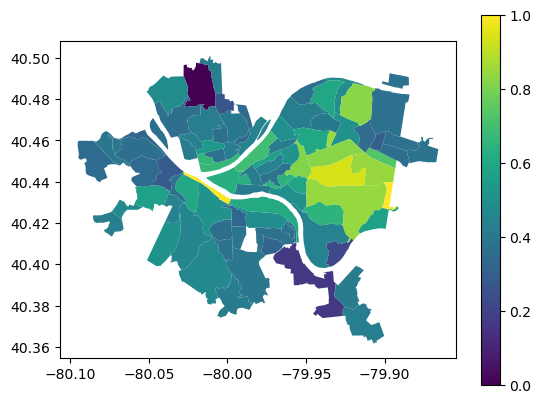

In [7]:
neighborhoods.plot(column='Edu Score', legend=True)

Here are the top 5 districts! South Shore, Regent Square, Squirrel Hill North, Friendship, and Point Breeze.

In [8]:
by_edu_score = neighborhoods.sort_values(by='Edu Score', ascending=False)[['hood', 'Edu Score']]
by_edu_score.head(5)

,hood,Edu Score
66,South Shore,1.000000
85,Regent Square,0.997117
1,Squirrel Hill North,0.938633
41,Friendship,0.850082
59,Point Breeze,0.844316
